In [16]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from pickle import dump
from pickle import load
from PIL import Image

In [2]:
inversores = pd.read_csv('../data2/datos_socioeconomicos.csv', index_col = 0 )
inversores

,HHSEX,AGECL,EDCL,MARRIED,KIDS,RACE,OCCAT1,KNOWL,YESFINRISK,NOFINRISK,NWCAT,INCCAT,Tolerancia_riesgo
0,2,6,4,2,0,1,1,6,0,0,5,3,0.926181
1,2,6,4,2,0,1,1,6,0,0,5,3,0.919388
2,2,6,4,2,0,1,1,6,0,0,5,3,0.921627
3,2,6,4,2,0,1,1,6,0,0,5,2,0.944681
4,2,6,4,2,0,1,1,6,0,0,5,3,0.925676
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28880,1,3,1,1,0,1,2,7,0,1,5,6,0.693498
28881,1,3,1,1,0,1,2,7,0,1,5,6,0.697253
28882,1,3,1,1,0,1,2,7,0,1,5,6,0.690558
28883,1,3,1,1,0,1,2,7,0,1,5,6,0.708311


In [3]:
stock = pd.read_csv('../data2/SP500Data.csv',index_col=0)
stock

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,58.790001,98.410004,192.490005,153.839996,64.309998,177.699997,10.980000,106.089996,10.88,203.039993,...,146.990005,164.300003,47.810001,29.370001,67.879997,68.070000,81.599998,124.059998,50.700001,71.769997
2018-01-03,58.919998,99.949997,195.820007,154.550003,65.309998,181.039993,11.550000,107.050003,10.87,202.119995,...,149.740005,162.520004,47.490002,29.330000,69.239998,68.900002,81.529999,124.919998,50.639999,72.099998
2018-01-04,58.820000,99.379997,199.250000,156.380005,64.660004,183.220001,12.120000,111.000000,10.83,198.539993,...,151.259995,163.399994,47.119999,29.690001,70.489998,69.360001,82.360001,124.739998,50.849998,72.529999
2018-01-05,58.990002,101.110001,202.320007,157.669998,66.370003,185.339996,11.880000,112.180000,10.87,199.470001,...,152.229996,164.490005,46.790001,29.910000,74.150002,69.230003,82.839996,125.980003,50.869999,73.360001
2018-01-08,58.820000,99.489998,207.800003,158.929993,66.629997,185.039993,12.280000,111.389999,10.87,200.529999,...,151.410004,162.300003,47.139999,30.260000,74.639999,69.480003,82.980003,126.220001,50.619999,74.239998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-07,81.040001,74.330002,164.429993,186.809998,55.410000,276.899994,28.930000,158.270004,15.85,74.830002,...,187.589996,107.019997,64.279999,29.830000,92.629997,75.570000,113.690002,134.500000,43.439999,126.070000
2019-10-08,78.510002,73.529999,159.490005,182.199997,54.130001,270.829987,28.230000,154.330002,15.51,71.800003,...,184.360001,102.570000,63.590000,28.309999,89.269997,73.430000,112.589996,131.220001,42.209999,125.379997
2019-10-09,79.500000,73.300003,159.309998,184.339996,53.430000,274.269989,28.459999,154.410004,15.54,72.250000,...,186.199997,104.419998,63.919998,28.760000,90.480003,74.570000,113.330002,133.419998,42.419998,126.430000


In [4]:
stock=stock.fillna(method='ffill')

In [5]:
stock=stock.fillna(method='bfill')

In [6]:
print('Null Values =',stock.isnull().values.any())

Null Values = False


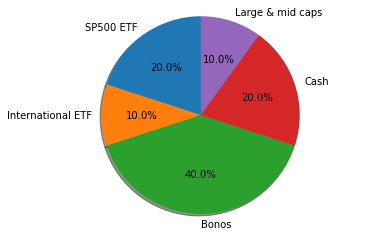

In [22]:

st.title('Robo-advisor')

st.write("# Paso 1: Complete el cuestionario")

Sexo = st.select_slider('Sexo', options=['Hombre', 'Mujer'])
Edad = st.select_slider('Edad', options=['<35', '35-44', '45-54', '55-64', '65-74', '>75'])
Educación = st.select_slider('Educación', options=['ESO', 'Bachillerato', 'FP Grado superior', 'Grado Universidad'])
Casado = st.select_slider('Estado civil', options=['Casado', 'Soltero/Divorciado/Viudo'])
Hijos = st.select_slider('Número de hijos', options=['0', '1', '2', '3', '4', '5', '6', '7'])
Raza = st.select_slider('Raza', options=['Blanco', 'Afroamericano', 'Hispano', 'Otro'])
Trabajo = st.select_slider('Estado laboral', options=['Trabajando para otra persona', 'Autónomo/empresario', 'Estudiante/jubilado', 'Desempleado'])
Conocimiento = st.slider('De 1 a 10 cómo es tu conocimiento financiero', 1-10)
Risk = st.slider('De 1 a 4 cúanto estarías dispuesto a tomar riesgos financieros', 1-4)
Patrimonio = st.select_slider('Patrimonio neto', options=['0 €', 'Entre 0 y 75.000 €', 'Entre 75.000 € y 180.000 €', 'Entre 180.000 € y 370.000 €', 'Entre 370.000 € y 1.350.000 €'])
Renta = st.select_slider('Renta anual', options=['<900 €', 'Entre 900 € y 1.350 €', 'Entre 1.350 € y 1.700 €', 'Entre 1.700 € y 2.400 €', 'Entre 2.400 € y 3.000 €', '>3.000 €'])


if Sexo=='Hombre':
    Sexo=1
else:
    Sexo=2
    
if Edad=='<35':
    Edad=1
elif Edad=='35-44':
    Edad=2
elif Edad=='45-54':
    Edad=3
elif Edad=='55-64':
    Edad=4
elif Edad=='65-74':
    Edad=5
else:
    Edad=6

if Educación=='ESO':
    Educación=1
elif Educación=='Bachillerato':
    Educación=2
elif Educación=='FP Grado superior':
    Educación=3
else:
    Educación=4

if Casado=='Casado':
    Casado=1
else:
    Casado=2

if Raza=='Blanco':
    Raza=1
elif Raza=='Afroamericano':
    Raza=2
elif Raza=='Hispano':
    Raza=3
else:
    Raza=5

if Trabajo=='Trabajando para otra persona':
    Trabajo=1
elif Trabajo=='Autónomo/empresario':
    Trabajo=2
elif Trabajo=='Estudiante/jubilado':
    Trabajo=3
else:
    Trabajo=4

if Risk==1:
    NoRisk=1
elif Risk==4:
    YesRisk=1
else:
    NoRisk=0
    YesRisk=0
    
if Patrimonio=='0 €':
    Patrimonio=1
elif Patrimonio=='Entre 0 y 75.000 €':
    Patrimonio=2
elif Patrimonio=='Entre 75.000 € y 180.000 €':
    Patrimonio=3
elif Patrimonio=='Entre 180.000 € y 370.000 €':
    Patrimonio=4
else:
    Patrimonio=5   
    
if Renta=='<900 €':
    Renta=1
elif Renta=='Entre 900 € y 1.350 €':
    Renta=2
elif Renta=='Entre 1.350 € y 1.700 €':
    Renta=3
elif Renta=='Entre 1.700 € y 2.400 €':
    Renta=4
elif Renta=='Entre 2.400 € y 3.000 €':
    Renta=5
else:
    Renta=6
    
    
def predict_riskTolerance(X_input):
    filename = 'Modelo_aprendizaje_supervisado.sav'
    loaded_model = load(open(filename, 'rb'))
    predictions = loaded_model.predict(X_input)
    return predictions
     
        
if st.button('Descubra su tolerancia al riesgo'):
    X_input = [[Sexo,Edad,Educación,Casado,Hijos,Raza, Trabajo,Conocimiento,YesRisk,NoRisk,Patrimonio,Renta]]
    RiskTolerance= predict_riskTolerance(X_input)
    st.write('Su tolerancia al riesgo es: %s' % RiskTolerance)
    if RiskTolerance==0:
        st.write('Su perfil de inversor es conservador')
    elif RiskTolerance>0.9:
        st.write('Su perfil de inversor es agresivo')
    else:
        st.write('Su perfil de inversor es moderado')

        
graficos_acciones = st.selectbox(
    '# Paso 2: selecciona tu tipo de inversor para ver en qué activos invertir',
    ('Inversor conservador', 'Inversor moderado', 'Inversor agresivo')
)

if graficos_acciones== 'Inversor conservador':
    
    st.write('Portafolio inversor conservador')
    labels = 'SP500 ETF', 'International ETF', 'Bonos', 'Cash', 'Large & mid caps'
    sizes = [20, 10, 40, 20, 10] 
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal')  
    st.pyplot(fig1)
    
    image = Image.open('Stocks conservadores.jpg')
    st.image(image, caption='Evolución portafolio compuesto por una acción de cada empresa del cluster conservador')
    
elif graficos_acciones== 'Inversor moderado':
    
    st.write('Portafolio inversor moderado')
    labels = 'SP500 ETF', 'International ETF', 'Bonos', 'Cash', 'Large & mid caps'
    sizes = [30, 15, 25, 10, 20]  
    fig2, ax2 = plt.subplots()
    ax2.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax2.axis('equal')  
    st.pyplot(fig2)
    
    image = Image.open('Stocks moderados.jpg')
    st.image(image, caption='Evolución portafolio compuesto por una acción de cada empresa del cluster moderado')
    
else:
    
    st.write('Portafolio inversor agresivo')
    labels = 'SP500 ETF', 'International ETF', 'Bonos', 'Cash', 'Large & mid caps', 'Bitcoin'
    sizes = [30, 15, 15, 5, 25, 10] 
    fig3, ax3 = plt.subplots()
    ax3.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax3.axis('equal')  
    st.pyplot(fig3)
    
    image = Image.open('Stocks agresivos.jpg')
    st.image(image, caption='Evolución portafolio compuesto por una acción de cada empresa del cluster agresivo')

In [25]:
np.load('stocks_moderados.npy')

ValueError: Object arrays cannot be loaded when allow_pickle=False